# 事前設定

## パッケージ読み込み

In [1]:
### 必要なパッケージ（ライブラリ）の読み込み ###
import pandas as pd             # データフレーム型変数を取り扱えるパッケージ"pandas"を読込み（以降"pd"と略記）
import matplotlib.pyplot as plt # グラフ描画のパッケージ"matplotlib"を読込み（以降"plt"と略記）
import seaborn as sns           # 上記matplotlibをベースにした高機能可視化モジュール"saeborn"を読込み（以降"sns"と略記）
import numpy as np              # 数値演算のためのパッケージ"numpy"を読込み（以降"np"と略記）

## 描画設定

In [2]:
### 文字化け対策用のコード ###
# 自身のPC環境に合わせて、該当する方のみ残す（もう片方はコメントアウトする）

# for Win
plt.rcParams['font.sans-serif'] = ['Yu Gothic'] #もしくは、['Yu Mincho’]

# for Mac
# plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']

In [3]:
### 以下、描画の細かいデザイン設定 ###

# 出力されるグラフ画像の解像度を上げる
%config InlineBackend.figure_formats = {'png', 'retina'}

# グラフのサイズ指定
# plt.rcParams['figure.figsize'] = 10, 5

# 文字化け対策にフォント指定（Win/Macなどの環境に依らず、横断的に設定）
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao',
                                   'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

# フォントサイズ一括指定
plt.rcParams['font.size'] = 14

# グラフ同士が重ならないようにする
# plt.tight_layout()

# グリッド表示ON
# plt.grid(True)

# 各種設定の反映・描画
plt.show()

# データ読み込み

## 画像データを読み込み

### 全画像ファイルのパスを抽出

In [4]:
# ループでフォルダ内の全てのエクセルファイルを読み込み、データフレーム連結

# 必要なパッケージを読み込み
import glob #パターンマッチでのパス取得を行うパッケージを読み込み
import os   #ファイル操作を行うパッケージを読み込み

# 画像データの格納パスを定義
# path = 'casting_image_data/train/'        #trainフォルダはデータ数が多すぎるので、PCスペック次第ではtestフォルダを指定
path = './data/20240820/casting_image_data/test/'

# 画像データの格納サブディレクトリを定義
subdir = ['def_front', 'ok_front']

data = {}

# ループでsdir
for sdir in subdir:

    data[sdir] = []
    
    # 対象ディレクトリに存在するファイルのリスト作成
    files = glob.glob(path + sdir + '/*.jpeg')
    
    for file in files:
        data[sdir].append(file)


### 画像を読み込み

In [8]:
# 画像処理を効率化するパッケージOpenCV (cv2) を読み込み
import cv2

  # 別途Anaconda Promptから、conda installが必要(下記コードをコピペして実行)
  # conda install -c conda-forge opencv
  # ※pip installを用いる場合は、Anaconda Prompt上 (※MacはTeminal上）で下記2つのコードを実行
  #  ① pip install opencv-python
  #  ② pip install opencv-contrib-python

# 欠陥画像、正常画像両方のデータを格納する空の辞書型
images_all = {} #画像用（説明変数）
def_ok_all = {} #品質用（目的変数）

# 画像をリサイズするための縦横画素数
width =  100
height = 100

# ループ処理でdef_front, ok_frontそれぞれの画像ファイルを網羅的に読込み、辞書型に格納
for sdir in subdir:  #def_front, ok_frontでループ
    images = []      #品質ごとのデータを入れる空リスト（初期化）
    def_ok = []      #品質のフラグを入れる空リスト（初期化）
    
    for file in data[sdir]: #ファイル名でループ
        img = cv2.imread(file)                     #画像ファイル読込み。imread()で読み込むと、BGR（青、緑、赤） の順となる
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #色の順番をBGR（青、緑、赤）→RGB（赤、緑、青）に変更
        img = cv2.resize(img, (width,height)).flatten()   #計算高速化のために画像サイズを圧縮 & ベクトルを平坦化
        images.append(img)        #リストに画像RGBデータを逐次格納
        def_ok.append(sdir)       #リストに品質フラグを逐次格納

    images_all[sdir] = images     #辞書型に画像データを逐次格納
    def_ok_all[sdir] = def_ok     #辞書型に品質フラグを逐次格納
    print(sdir, 'データ件数: ', len(images) )

def_front データ件数:  453
ok_front データ件数:  262


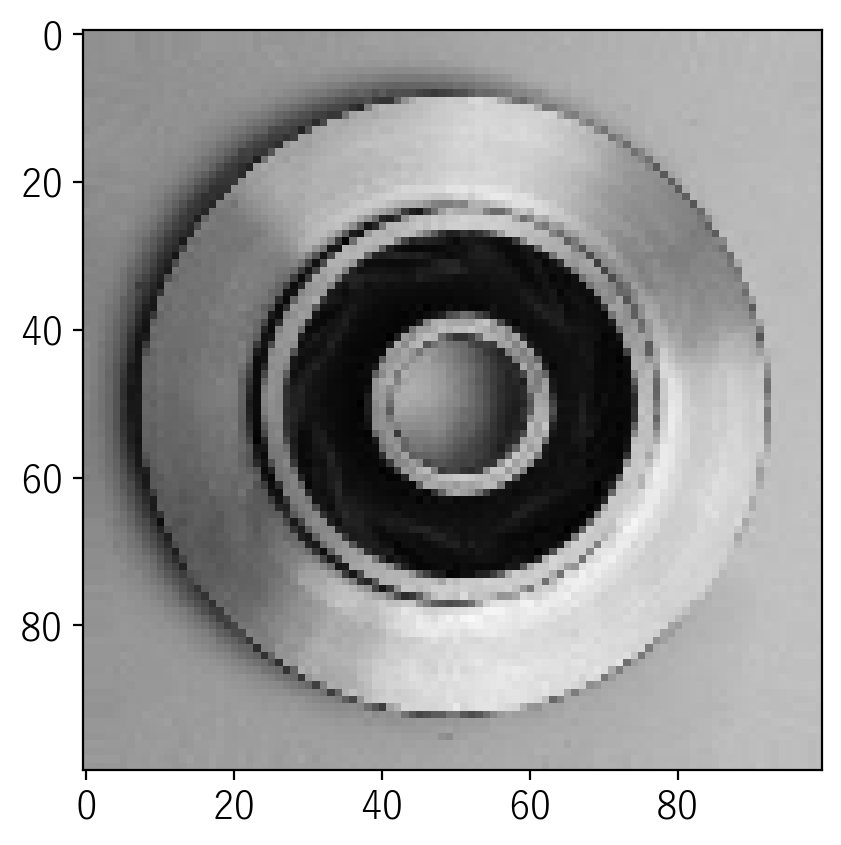

In [9]:
# 一つサンプル画像を表示
plt.imshow( [ x.reshape(width, height, 3) for x in images ][0] ) #平坦化したベクトルを再び画像形式に3次元化

# データ確認

## 欠陥／正常の比率

Text(0.5, 1.0, 'defect/ok ratio')

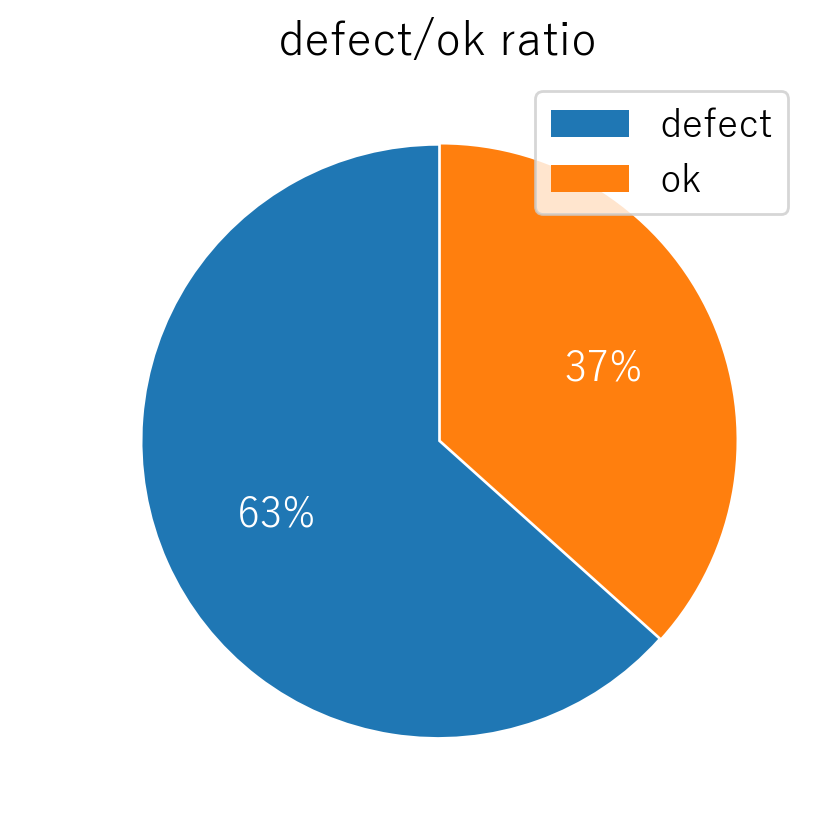

In [6]:
# 円グラフで欠陥／正常の割合を表示
plt.pie(x=[len(data['def_front']), len(data['ok_front'])], labels=['defect', 'ok'],
        autopct='%1.0f%%',shadow=False, textprops={'color':'w', 'fontsize':15}, startangle=90, explode=(0,.01))

plt.legend() #凡例

plt.title('defect/ok ratio') #タイトル

## 画像を表示して確認

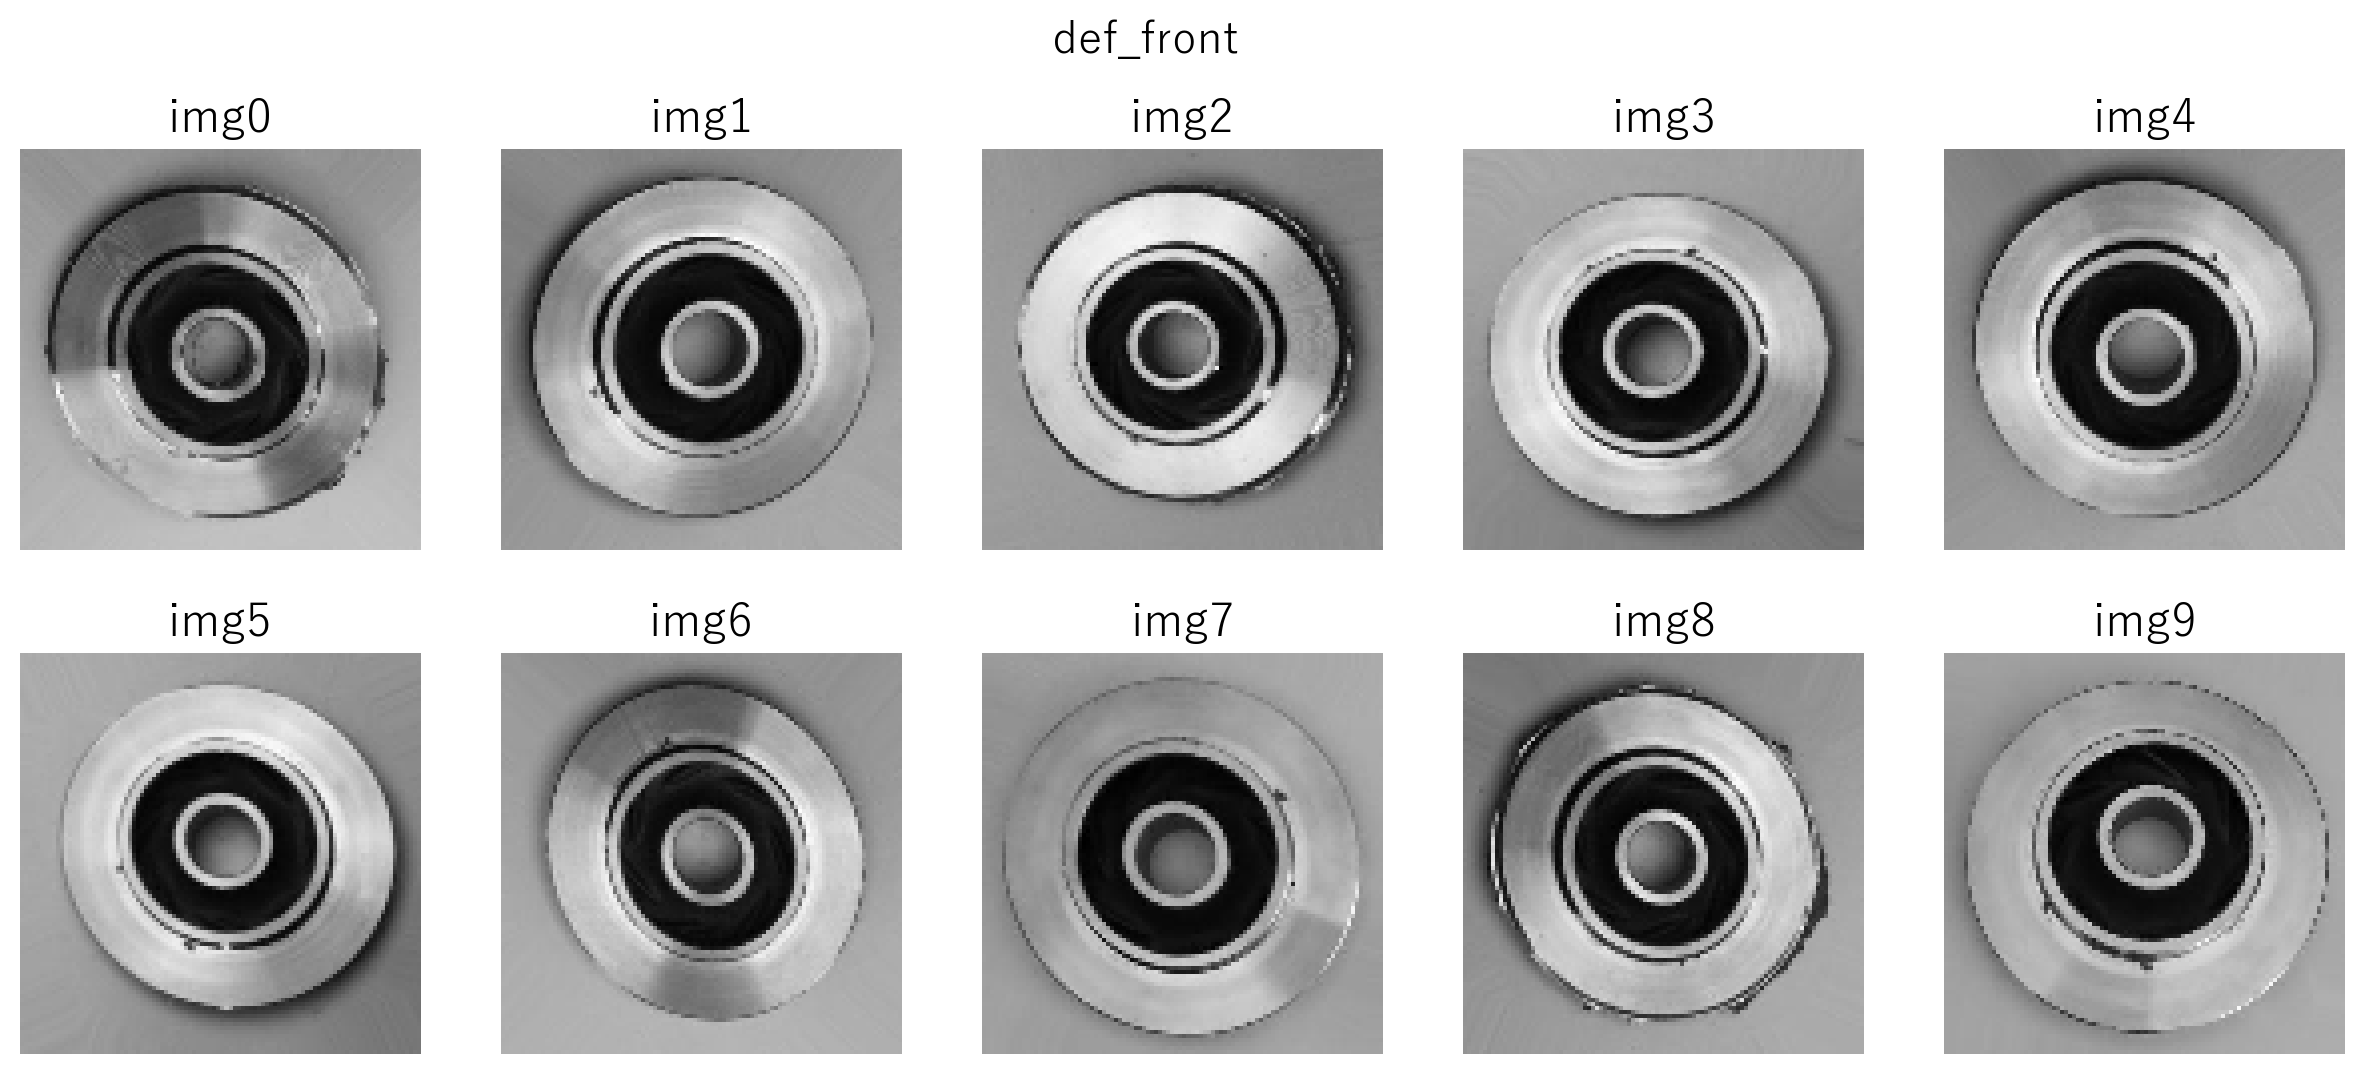

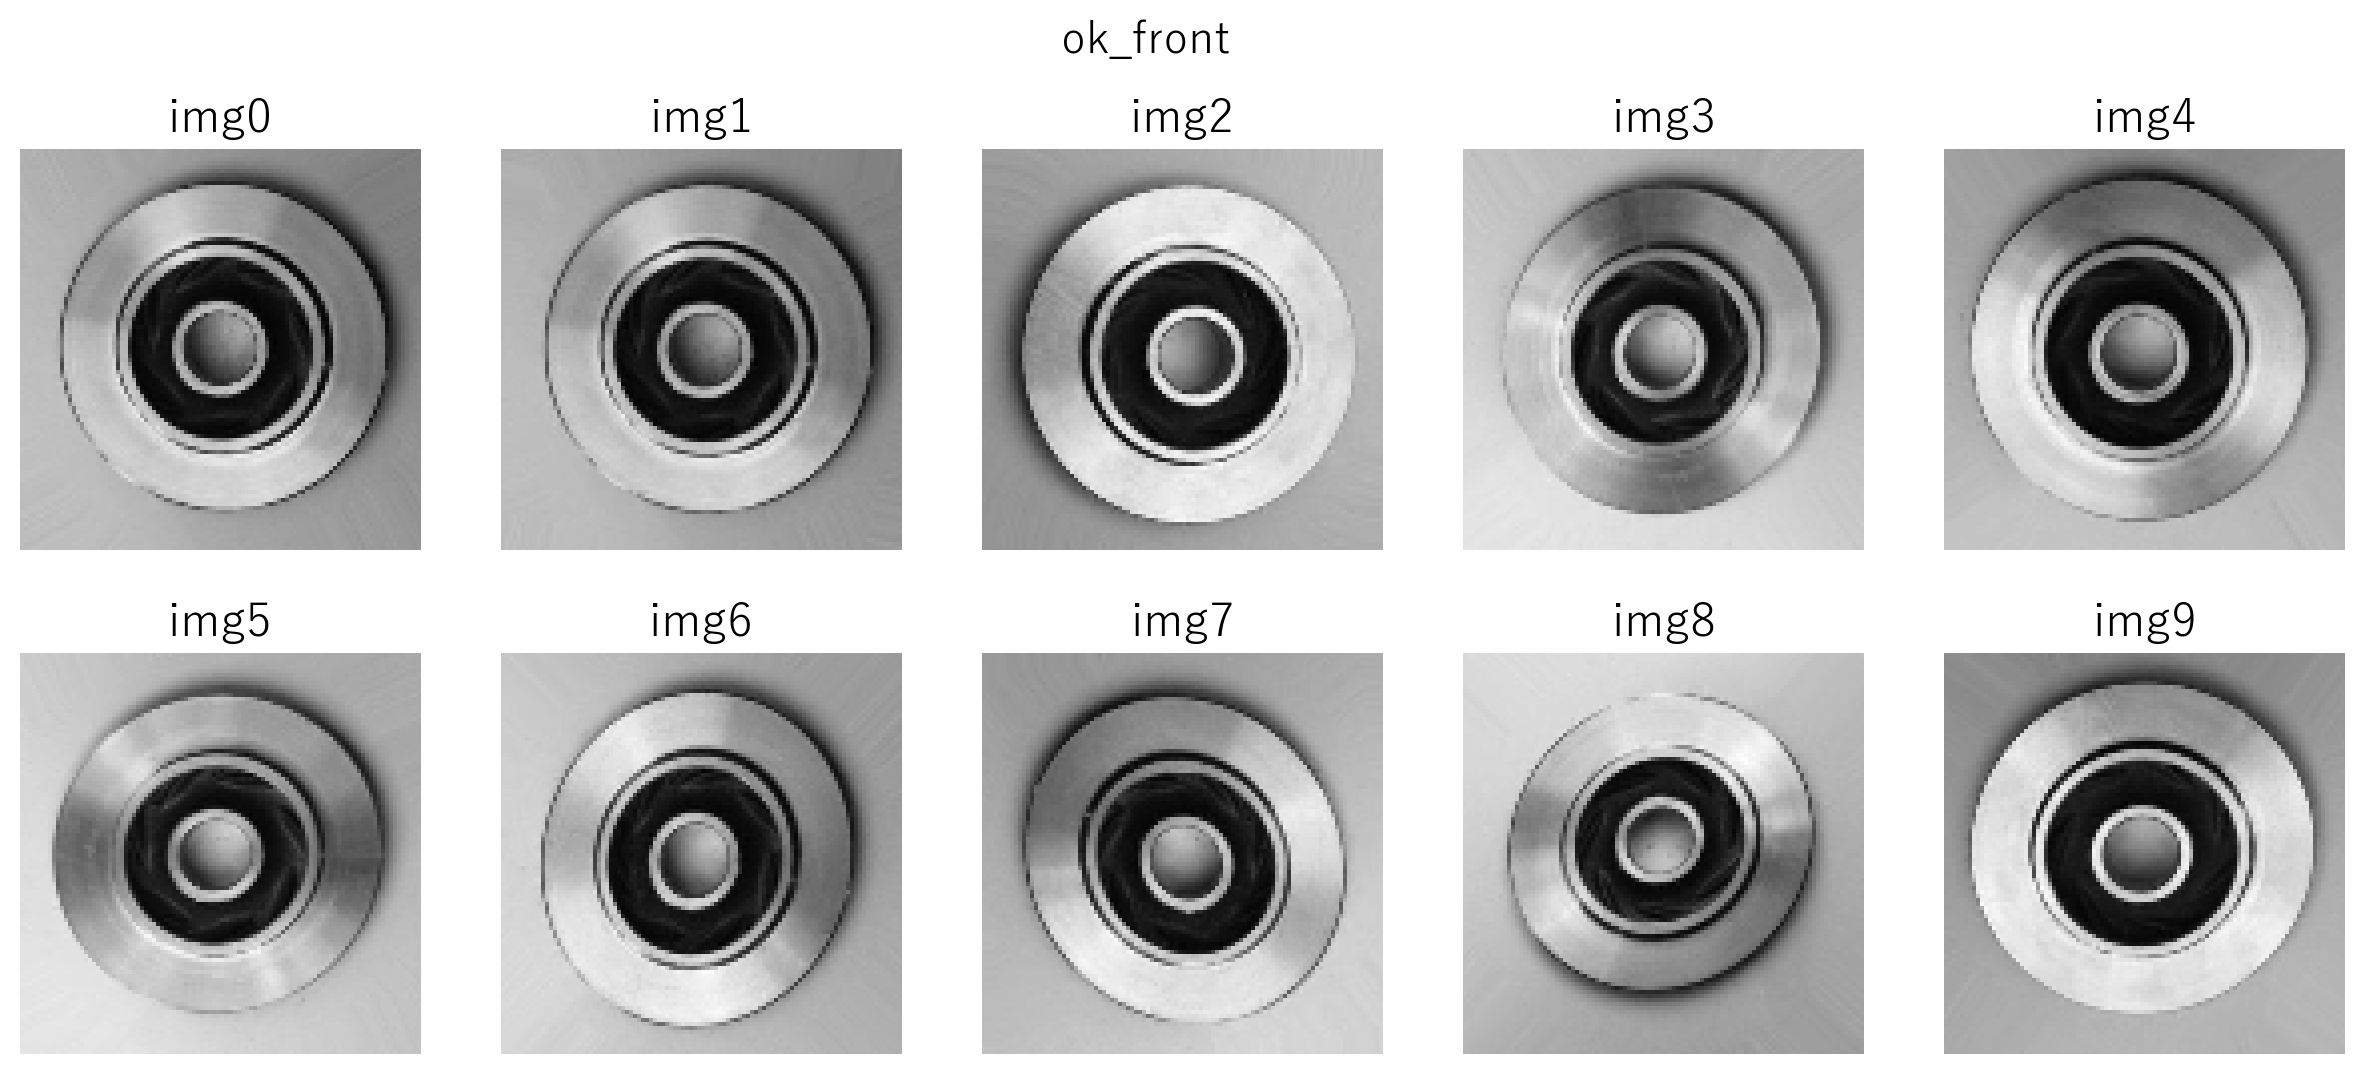

In [10]:
# 必要なパッケージの読み込み
import random, math #乱数を扱うrandom、数学演算を扱うmath

# 表示する画像数を指定
count = 10

# 欠陥画像、正常画像を各々ランダムに指定した数分出力
for sdir in subdir: #def_front, ok_frontでループ
    
    # 描画領域のサイズを指定
    plt.figure(figsize=(15, 6))
    # 描画タイトル（欠陥／正常）を表示
    plt.suptitle(sdir, size=16)

    for i, img in enumerate(random.sample(images_all[sdir], count)):#重複なしのランダム抽出
        img_reshape = img.reshape(width, height, 3) #データ格納時に平坦化したベクトルを、描画用に再び画像形式の3次元化
        plt.subplot( math.ceil(count/5), 5, i+1 )   #math.ceil(xx)で小数点以下切り上げ
        plt.axis('off')          #軸を非表示
        plt.title('img'+str(i))  #画像タイトルを表示
        plt.imshow(img_reshape)  #画像を描画

# データ加工

## 機械学習への入力データ形式に変換

In [11]:
# 一般的な機械学習手法における入力形式に合わせるため、
# 辞書型でデータを持つのではなく、リスト結合した形式に変換

# 画像データ（RGBデータ）
images_all_list = sum( list(images_all.values()), [] ) #xx.values()で辞書型から値のみ抽出し、list()でリスト変換
                                                       #2重リストになっているため、sum(2重リスト, []) で通常のリストに平坦化
# 品質フラグ
def_ok_all_list = sum( list(def_ok_all.values()), [] )

## 目的変数のダミー変数化

In [12]:
# ダミー変数化前のフラグ値
set( def_ok_all_list ) #set(リスト)でリスト内のユニークな出現値を出力

{'def_front', 'ok_front'}

In [13]:
# ダミー変数化
def_ok_all_dummy = [ 1 if x=='def_front' else 0 for x in def_ok_all_list ]
                    # リストにおける条件付き置換は、少し複雑で、
                    # [真の値 if 条件式 else 偽の値 for 任意の変数名 in 元のリスト] の形式で記述する

# ユニーク出現値を出力
set( def_ok_all_dummy )

{0, 1}

## 正規化（0~1）

In [14]:
# 0~1の範囲に正規化するため、最大値である255で除算
images_all_norm = [ x/255 for x in images_all_list ] #リスト内包表記により逐次的に各要素のarrayに対して処理

# モデル構築

## 説明変数・目的変数の設定

In [15]:
# 説明変数
X = images_all_norm
# 目的変数
Y = def_ok_all_dummy

## ロジスティック回帰

### モデル構築

In [16]:
# 必要なパッケージの読み込み
from sklearn.linear_model import LogisticRegression

# モデル構築
model = LogisticRegression()
model.fit(X, Y)

C:\Users\B221228\Desktop\analysis_2\ds_intermediate\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### モデル評価

In [17]:
## 混同行列、各種精度指標の可視化 ###
#モデル予測結果の取得
Y_pred = model.predict(X)  # モデルに説明変数を入力して、予測結果を出力

#ライブラリ読込：モデル評価のためのライブラリ
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#各種 精度指標の出力
print('混同行列 (confusion matrix) = \n', confusion_matrix(y_true= Y, y_pred= Y_pred, labels=[1,0]))
print('正解率 (accuracy) = ', accuracy_score(y_true= Y, y_pred= Y_pred))
print('適合率 (precision) = ', precision_score(y_true= Y, y_pred= Y_pred, pos_label=1))
print('再現率 (recall) = ', recall_score(y_true= Y, y_pred= Y_pred, pos_label=1))
print('F値 (f1 score) = ', f1_score(y_true= Y, y_pred= Y_pred, pos_label=1))

混同行列 (confusion matrix) = 
 [[453   0]
 [  0 262]]
正解率 (accuracy) =  1.0
適合率 (precision) =  1.0
再現率 (recall) =  1.0
F値 (f1 score) =  1.0


### 誤分類結果の調査

In [18]:
# 混同行列における所在位置のインデックス
a_TP_index = (Y_pred==Y)&(Y_pred==1) #True Positive（正答）
b_FP_index = (Y_pred!=Y)&(Y_pred==1) #False Positive（誤報）
c_FN_index = (Y_pred!=Y)&(Y_pred==0) #False Negative（見逃し）
d_TN_index = (Y_pred==Y)&(Y_pred==0) #True Negative（正答）

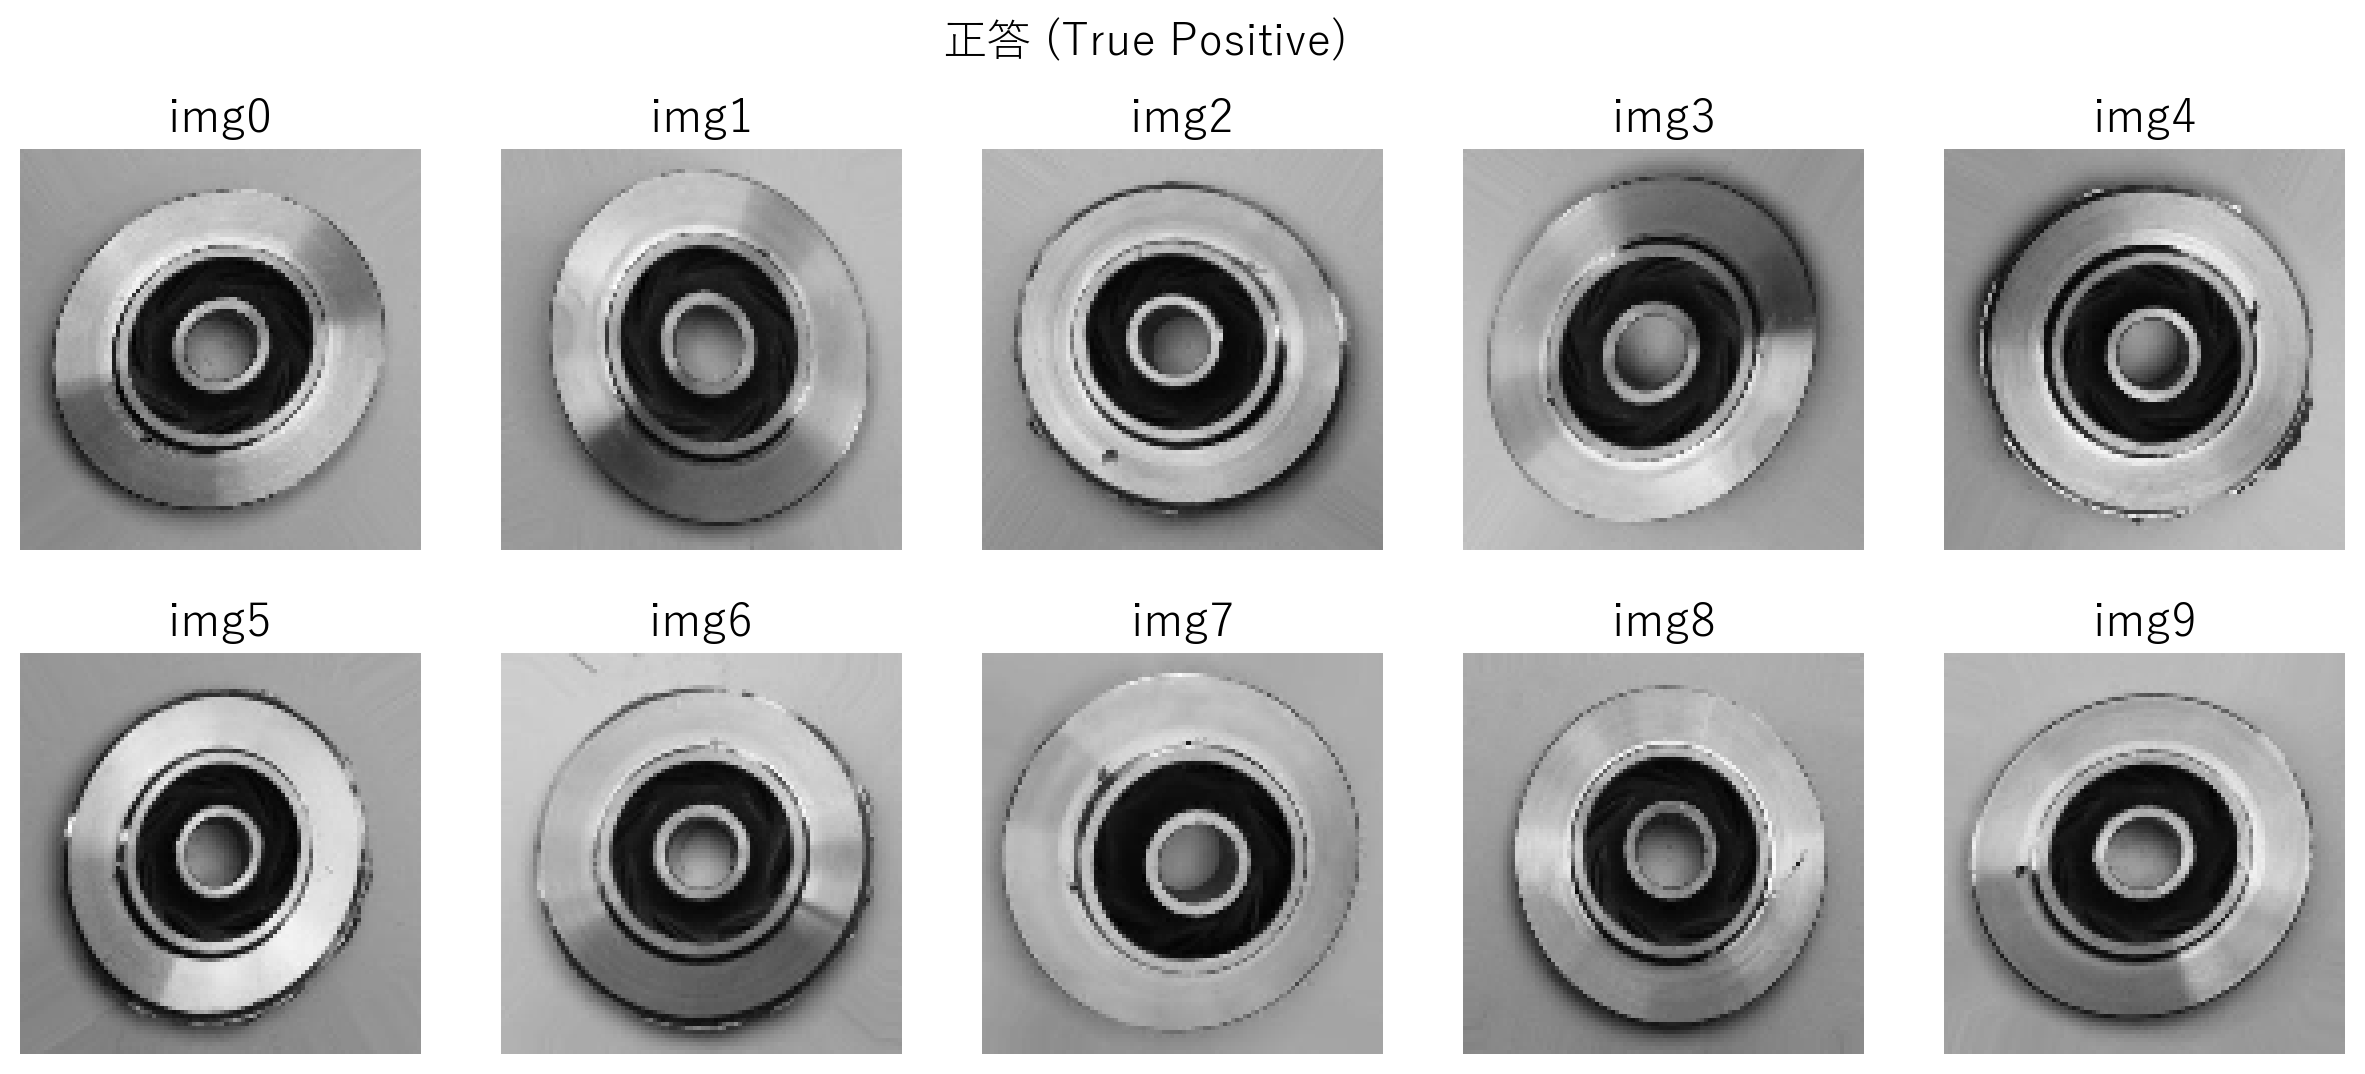

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

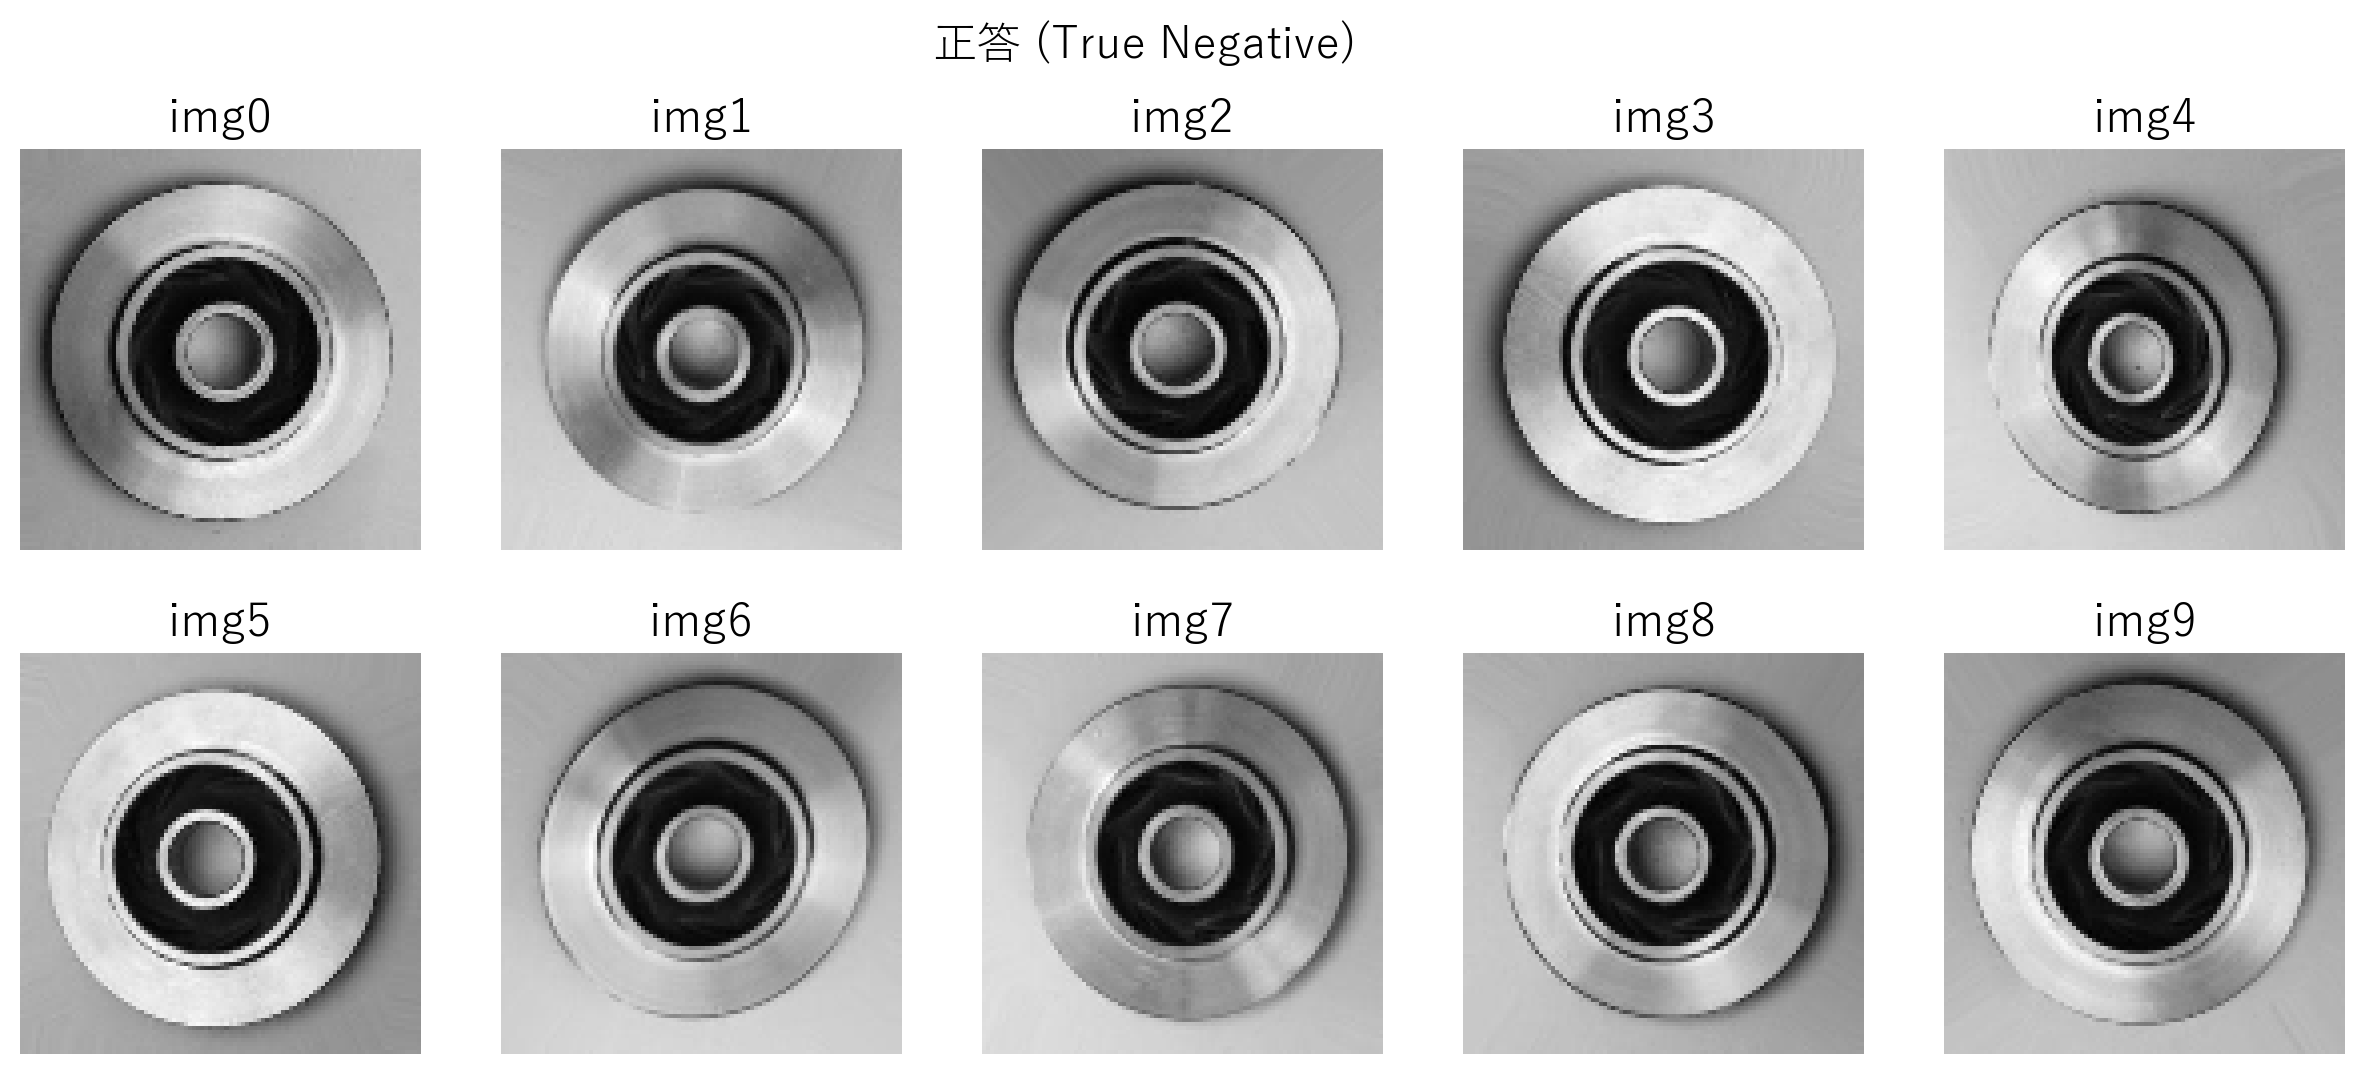

In [19]:
# 必要なパッケージの読み込み
import random, math #乱数を扱うrandom、数学演算を扱うmath

# 表示する画像数を指定
count = 10
# 表示するタイトルの候補を指定
title_list = ['正答 (True Positive)', '誤報 (False Positive)', '見逃し (False Negative)', '正答 (True Negative)']

# 各要素ごとにループ
for j, idx in enumerate([a_TP_index, b_FP_index, c_FN_index, d_TN_index]):

    # 描画領域のサイズを指定
    plt.figure(figsize=(15, 6))
    # 描画タイトル（欠陥／正常）を表示
    plt.suptitle(title_list[j], size=16)
    
    for i, img in enumerate( np.array(X)[idx][:count] ):  #重複なしのランダム抽出
        img_reshape = img.reshape(width, height, 3) #データ格納時に平坦化したベクトルを、描画用に再び画像形式の3次元化
        plt.subplot( math.ceil(count/5), 5, i+1 )   #math.ceil(xx)で小数点以下切り上げ
        plt.axis('off')          #軸を非表示
        plt.title('img'+str(i))  #画像タイトルを表示
        plt.imshow(img_reshape)  #画像を描画


### モデル解釈

#### 変数名（行番号x列番号xRGB）を紐付け

In [20]:
# 保存用の空のリストを用意
position_name = []

for i in range(1, height*width*3+1):
    
    # 3で割った商と余りを抽出（i-1としているのは、商の繰り上りポイントを調整するため）
    quot_3, rem_3 = divmod(i-1, 3)
    # 列数x3で割った商と余りを抽出
    quot_wid, rem_wid = divmod(i-1, width*3)

    # 3で割ったあまりに応じて、R, G, Bのポジションを紐付け
    if rem_3==0:
        RGB='R'
    elif rem_3==1:
        RGB='G'
    else:
        RGB='B'

    # 行番号、列番号を抽出 
    row = quot_wid + 1
    col = ((i - 300*(row-1) -1)//3) + 1  #"//"で商を直接求める
    
    # 文字列結合
    pname = str(row) + '-' + str(col) + '-' + RGB
    
    # リストに格納
    position_name.append(pname)

In [21]:
print(position_name)

['1-1-R', '1-1-G', '1-1-B', '1-2-R', '1-2-G', '1-2-B', '1-3-R', '1-3-G', '1-3-B', '1-4-R', '1-4-G', '1-4-B', '1-5-R', '1-5-G', '1-5-B', '1-6-R', '1-6-G', '1-6-B', '1-7-R', '1-7-G', '1-7-B', '1-8-R', '1-8-G', '1-8-B', '1-9-R', '1-9-G', '1-9-B', '1-10-R', '1-10-G', '1-10-B', '1-11-R', '1-11-G', '1-11-B', '1-12-R', '1-12-G', '1-12-B', '1-13-R', '1-13-G', '1-13-B', '1-14-R', '1-14-G', '1-14-B', '1-15-R', '1-15-G', '1-15-B', '1-16-R', '1-16-G', '1-16-B', '1-17-R', '1-17-G', '1-17-B', '1-18-R', '1-18-G', '1-18-B', '1-19-R', '1-19-G', '1-19-B', '1-20-R', '1-20-G', '1-20-B', '1-21-R', '1-21-G', '1-21-B', '1-22-R', '1-22-G', '1-22-B', '1-23-R', '1-23-G', '1-23-B', '1-24-R', '1-24-G', '1-24-B', '1-25-R', '1-25-G', '1-25-B', '1-26-R', '1-26-G', '1-26-B', '1-27-R', '1-27-G', '1-27-B', '1-28-R', '1-28-G', '1-28-B', '1-29-R', '1-29-G', '1-29-B', '1-30-R', '1-30-G', '1-30-B', '1-31-R', '1-31-G', '1-31-B', '1-32-R', '1-32-G', '1-32-B', '1-33-R', '1-33-G', '1-33-B', '1-34-R', '1-34-G', '1-34-B', '1-35-

#### 偏回帰係数

In [22]:
# 偏回帰係数の出力（※大きい順にソート）
display( pd.DataFrame({'Variables':position_name, 'Coefficients':model.coef_.reshape(-1,)}).sort_values('Coefficients', ascending=False) )

# 切片の出力
print( '切片:', model.intercept_ )
    
# 決定係数の出力
print( '決定係数:', model.score(X, Y) )

,Variables,Coefficients
22087,74-63-G,0.241446
22088,74-63-B,0.241446
22086,74-63-R,0.241446
22319,75-40-B,0.207165
22318,75-40-G,0.207165
...,...,...
14218,48-40-G,-0.219109
14219,48-40-B,-0.219109
13919,47-40-B,-0.257551
13918,47-40-G,-0.257551


切片: [0.42529056]
決定係数: 1.0


## 決定木モデル

### モデル構築

In [23]:
### 決定木分析 ###
from sklearn import tree     # 機械学習パッケージに含まれた決定木分析モジュール"tree"を読込

# 決定木モデルを作成
model = tree.DecisionTreeClassifier(max_depth=3, criterion = 'gini', random_state=0)  # インスタンス化（関数を使える状態にする）
    # 各種設定パラメータの説明
    # tree.DecisionTreeRegressor(max_depth=3) とすれば、回帰木
    # max_depth: ツリーの最大深さ
    # criterion: データの分割指標を "gini"（ジニ係数） or "entropy" （情報エントロピー）で指定
    # random_state: 乱数のシード値。指定することで再分析時の再現性を担保
    # class_weight: 不均衡データに対する重みづけ ='balanced'
    
model.fit(X, Y)                            # モデル構築（フィッティング）

DecisionTreeClassifier(max_depth=3, random_state=0)

### モデル評価

In [24]:
## 混同行列、各種精度指標の可視化 ###
#モデル予測結果の取得
Y_pred = model.predict(X)  # モデルに説明変数を入力して、予測結果を出力

#ライブラリ読込：モデル評価のためのライブラリ
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#各種 精度指標の出力
print('混同行列 (confusion matrix) = \n', confusion_matrix(y_true= Y, y_pred= Y_pred, labels=[1,0]))
print('正解率 (accuracy) = ', accuracy_score(y_true= Y, y_pred= Y_pred))
print('適合率 (precision) = ', precision_score(y_true= Y, y_pred= Y_pred, pos_label=1))
print('再現率 (recall) = ', recall_score(y_true= Y, y_pred= Y_pred, pos_label=1))
print('F値 (f1 score) = ', f1_score(y_true= Y, y_pred= Y_pred, pos_label=1))

混同行列 (confusion matrix) = 
 [[411  42]
 [ 59 203]]
正解率 (accuracy) =  0.8587412587412587
適合率 (precision) =  0.874468085106383
再現率 (recall) =  0.9072847682119205
F値 (f1 score) =  0.8905742145178764


### 誤分類結果の調査

In [25]:
# 混同行列における所在位置のインデックス
a_TP_index = (Y_pred==Y)&(Y_pred==1) #True Positive（正答）
b_FP_index = (Y_pred!=Y)&(Y_pred==1) #False Positive（誤報）
c_FN_index = (Y_pred!=Y)&(Y_pred==0) #False Negative（見逃し）
d_TN_index = (Y_pred==Y)&(Y_pred==0) #True Negative（正答）

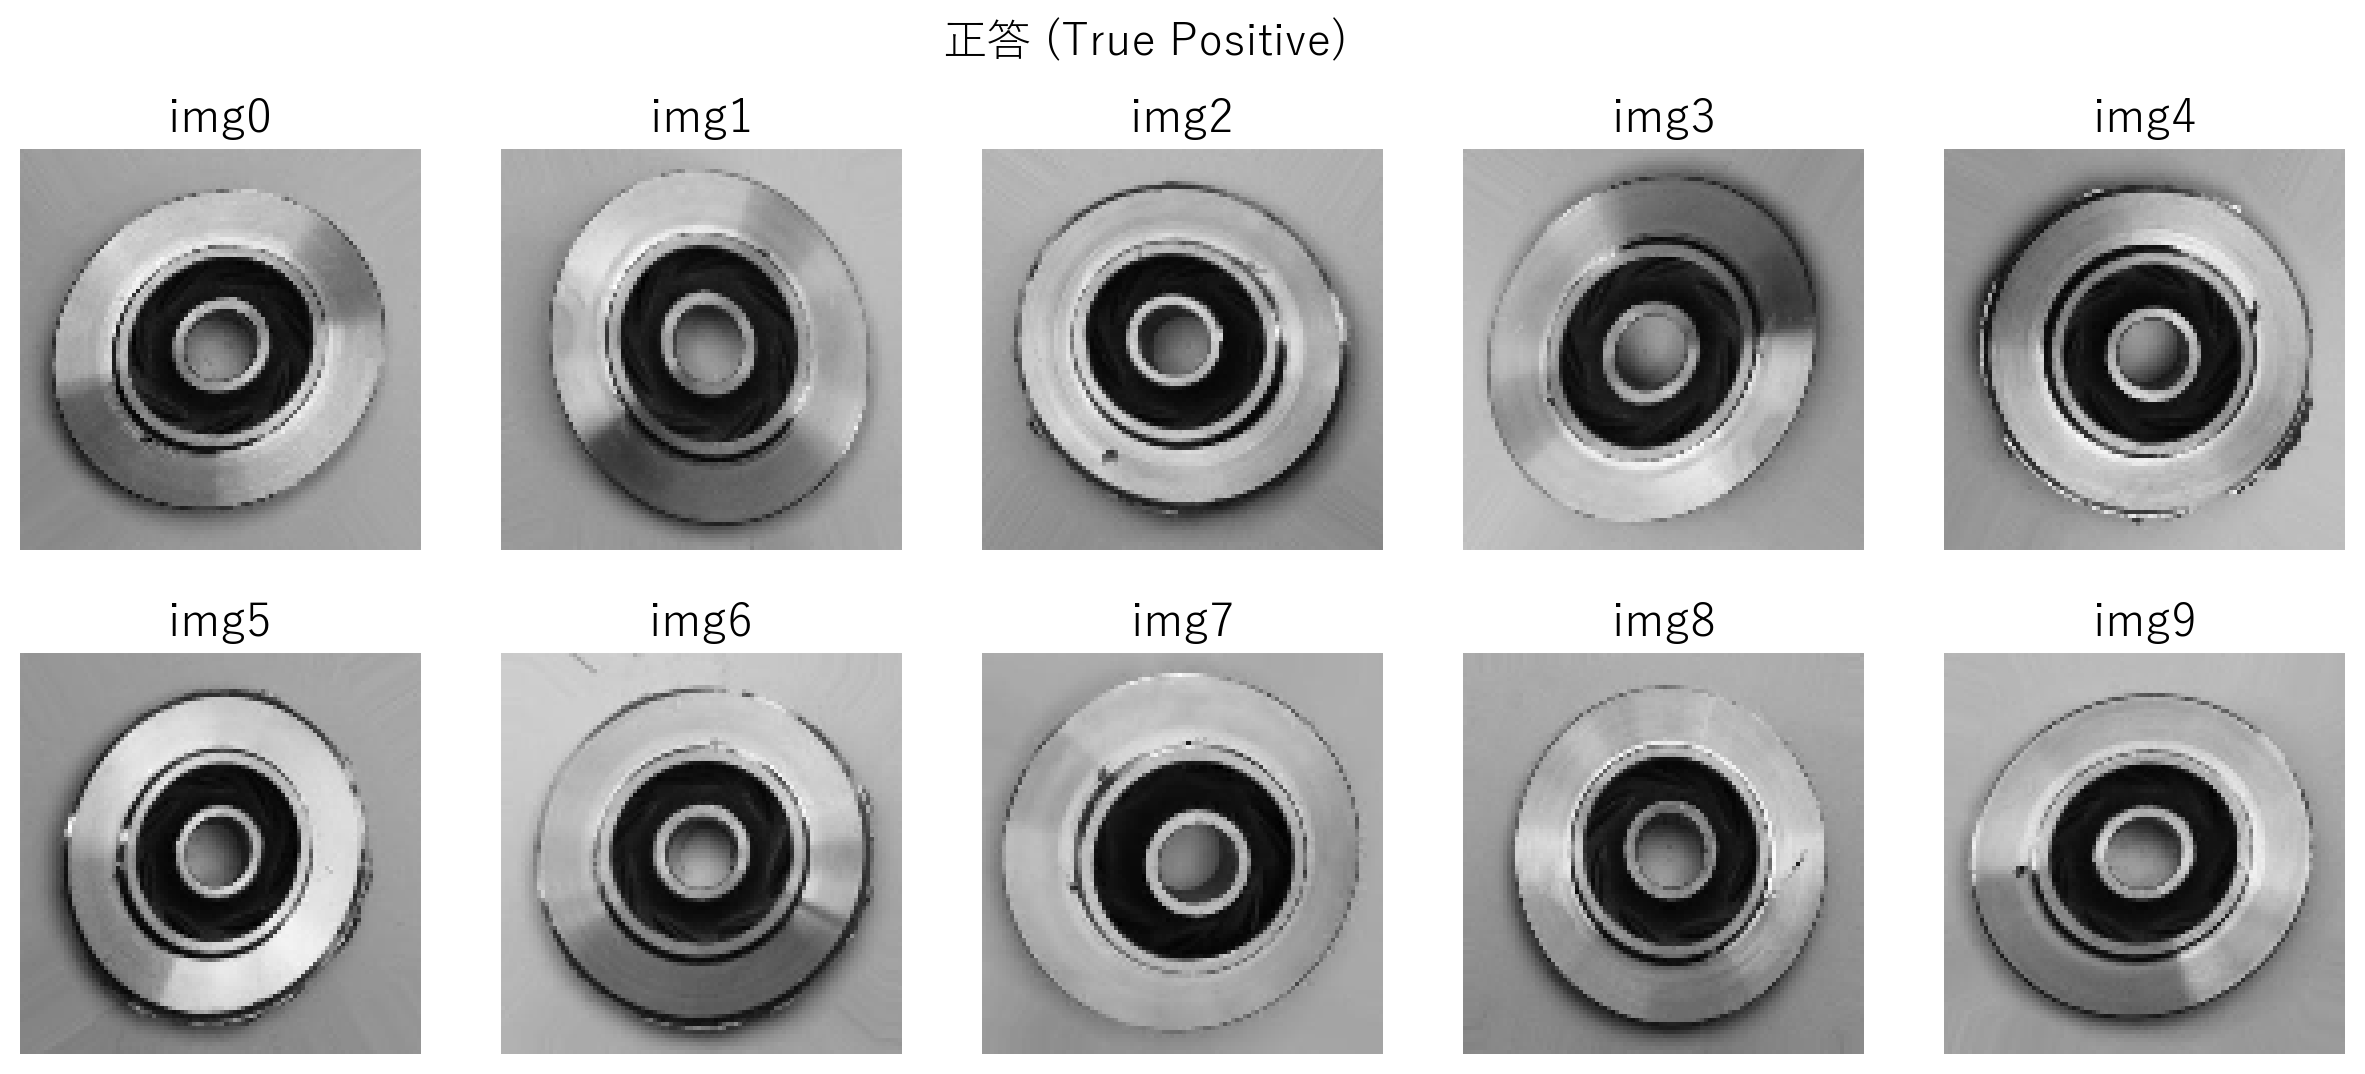

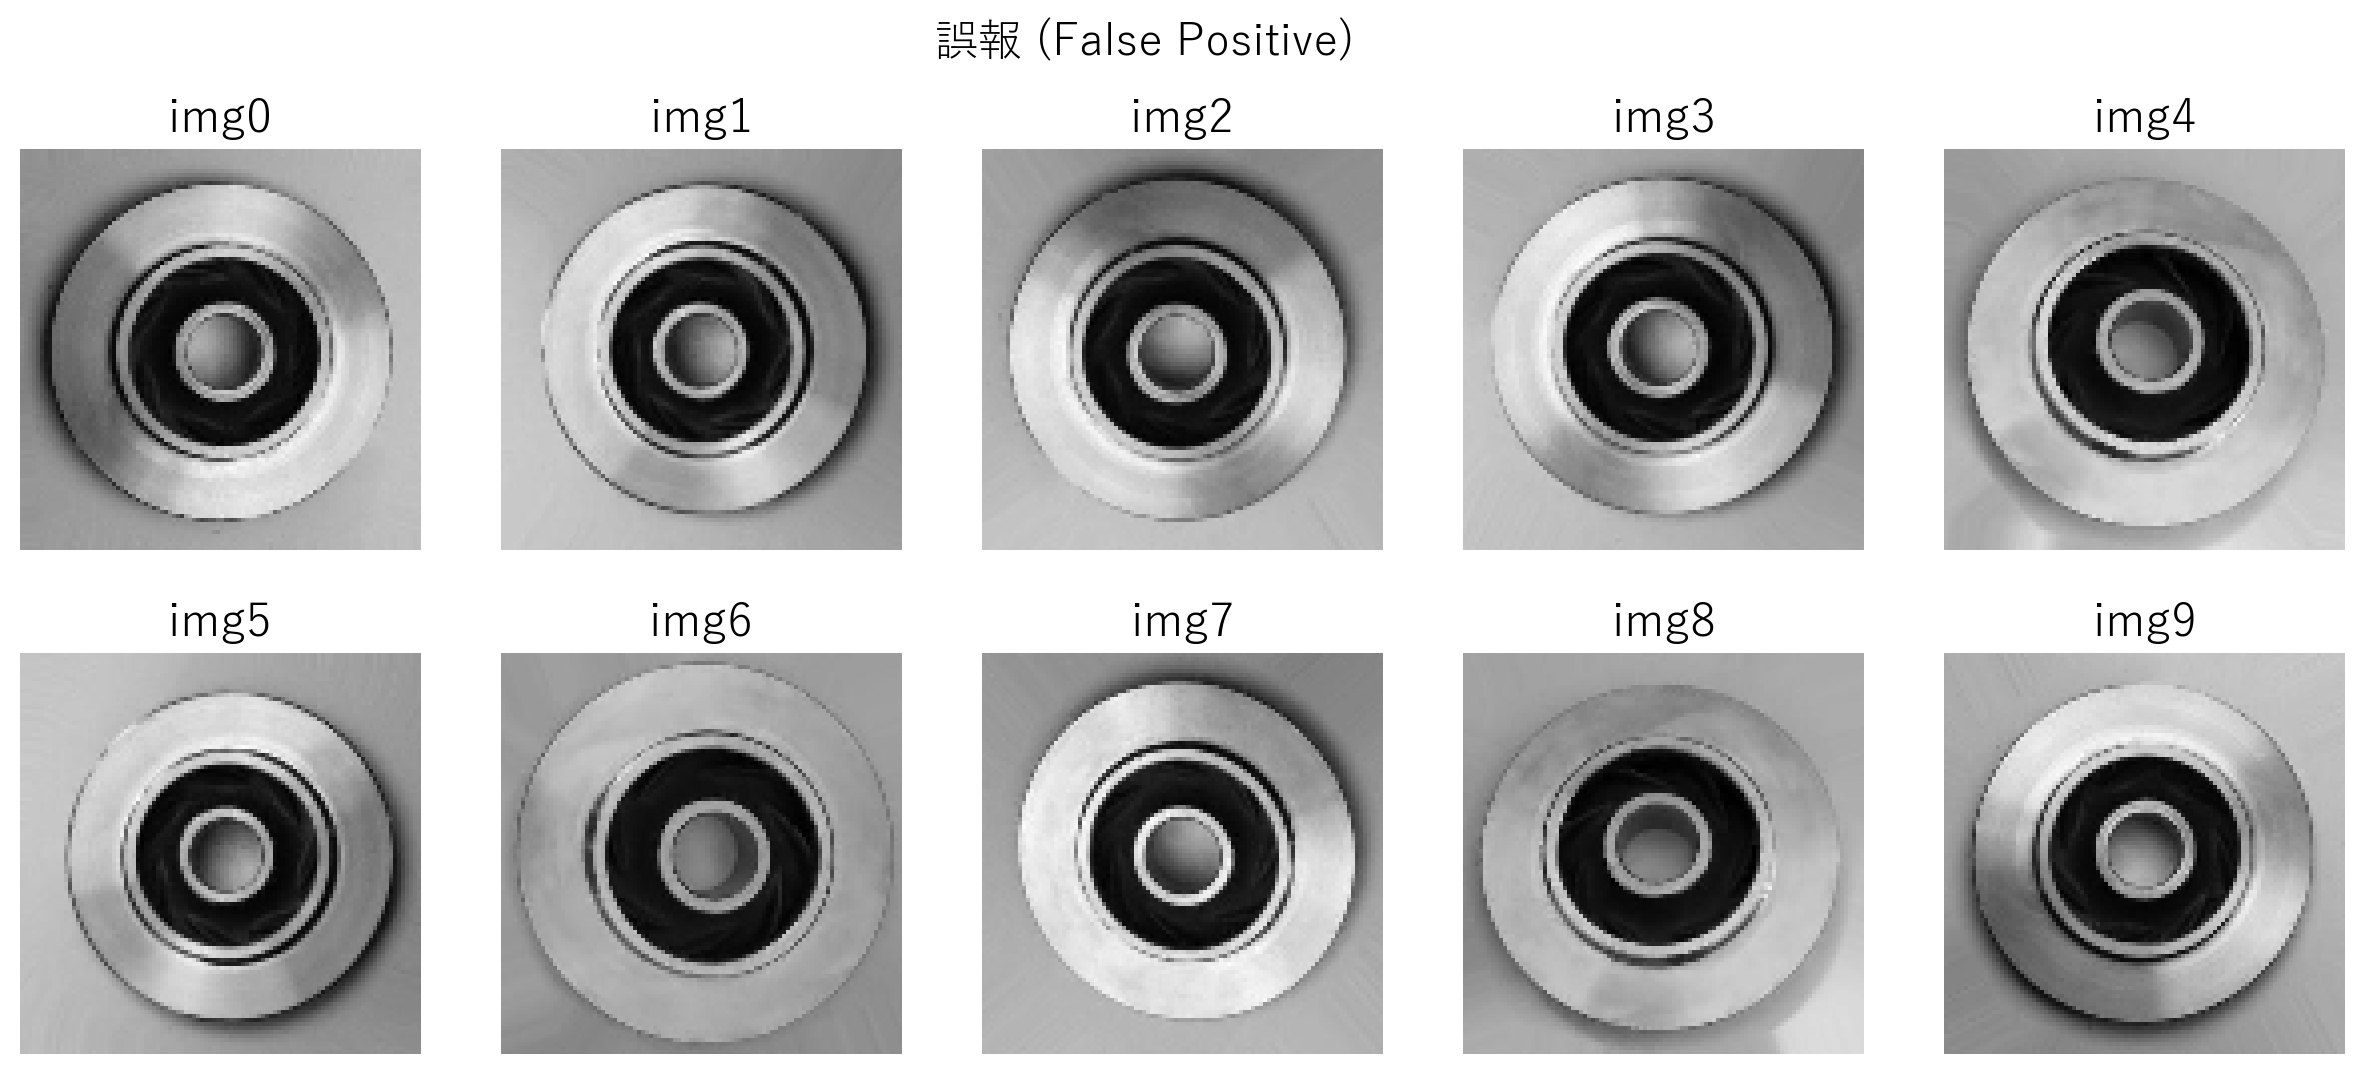

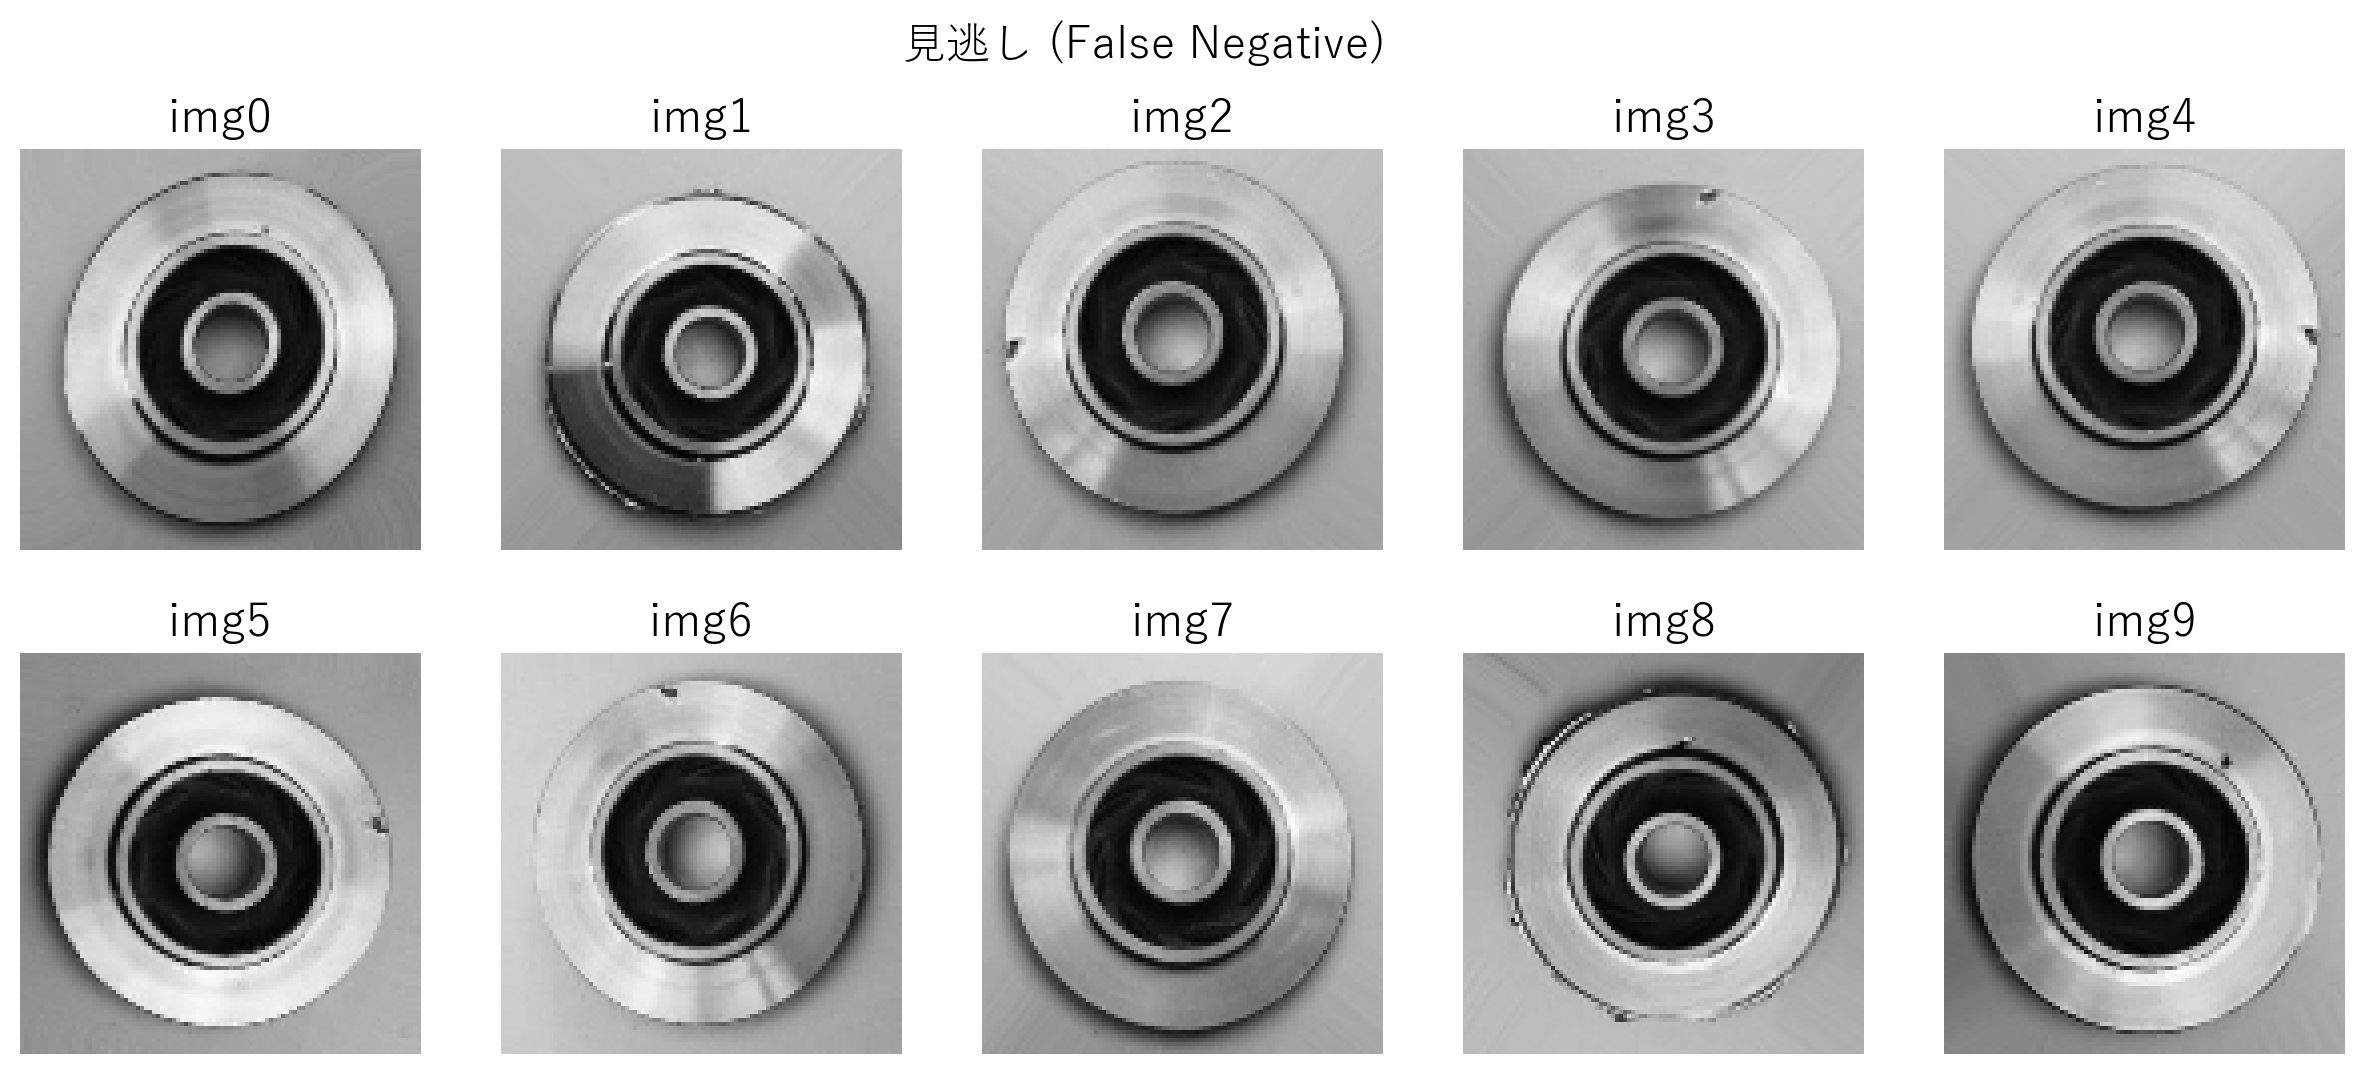

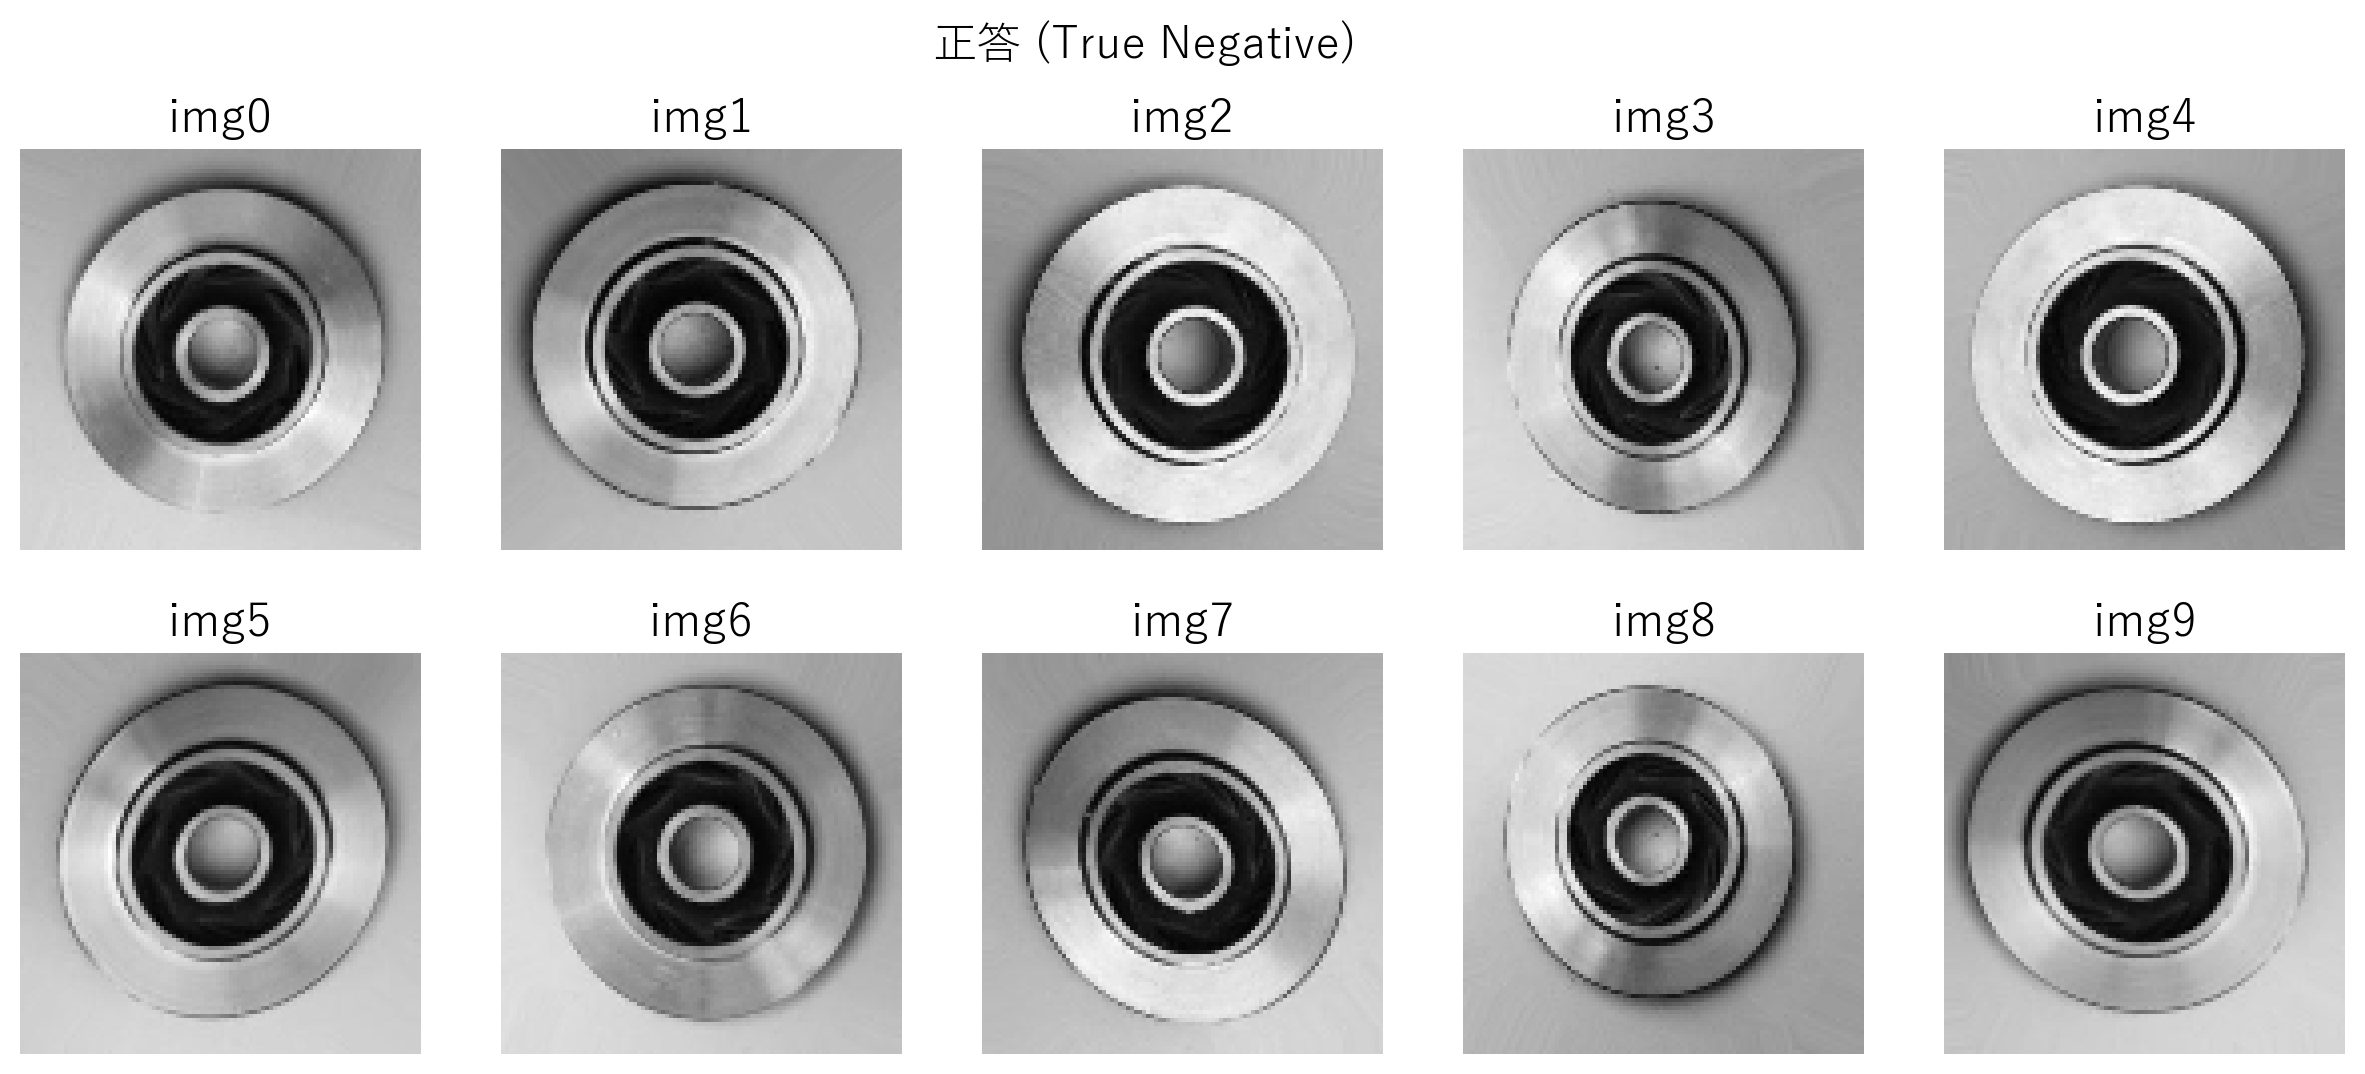

In [26]:
# 必要なパッケージの読み込み
import random, math #乱数を扱うrandom、数学演算を扱うmath

# 表示する画像数を指定
count = 10
# 表示するタイトルの候補を指定
title_list = ['正答 (True Positive)', '誤報 (False Positive)', '見逃し (False Negative)', '正答 (True Negative)']

# 各要素ごとにループ
for j, idx in enumerate([a_TP_index, b_FP_index, c_FN_index, d_TN_index]):

    # 描画領域のサイズを指定
    plt.figure(figsize=(15, 6))
    # 描画タイトル（欠陥／正常）を表示
    plt.suptitle(title_list[j], size=16)
    
    for i, img in enumerate( np.array(X)[idx][:count] ):  #重複なしのランダム抽出
        img_reshape = img.reshape(width, height, 3) #データ格納時に平坦化したベクトルを、描画用に再び画像形式の3次元化
        plt.subplot( math.ceil(count/5), 5, i+1 )   #math.ceil(xx)で小数点以下切り上げ
        plt.axis('off')          #軸を非表示
        plt.title('img'+str(i))  #画像タイトルを表示
        plt.imshow(img_reshape)  #画像を描画


## 参考：サポートベクターマシン

### モデル構築

In [27]:
# 非線形カーネルサポートベクターマシンによるクラス分類

###### ※計算時間が10分程度かかる可能性あり ######

## モデルの構築# 非線形カーネルサポートベクタマシンのライブラリ読み込み
from sklearn.svm import SVC  #scikit-learnパッケージ内の サポートベクタマシンモジュールより、
                             #サポートベクタマシンクラス分類のクラス (Support Vector Classifier) を読み込み
    

# サポートベクタマシンモデル構築
model = SVC() #インスタンス化（関数を使える状態にする）
              #パラメータの説明：
              # kernel: 非線形変換させるカーネル関数の指定 (kernel ='rbf' / 'linear' / 'poly' / 'sigmoid' / 'precomputed')
              #         何も指定しなければ、デフォルト値の 'rbf'（放射基底関数: Radial Basis Function）
            
model.fit(X, Y)  # サポートベクタマシン実行

SVC()

### モデル評価

In [28]:
## 混同行列、各種精度指標の可視化 ###
#モデル予測結果の取得
Y_pred = model.predict(X)  # モデルに説明変数を入力して、予測結果を出力

#ライブラリ読込：モデル評価のためのライブラリ
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#各種 精度指標の出力
print('混同行列 (confusion matrix) = \n', confusion_matrix(y_true= Y, y_pred= Y_pred, labels=[1,0]))
print('正解率 (accuracy) = ', accuracy_score(y_true= Y, y_pred= Y_pred))
print('適合率 (precision) = ', precision_score(y_true= Y, y_pred= Y_pred, pos_label=1))
print('再現率 (recall) = ', recall_score(y_true= Y, y_pred= Y_pred, pos_label=1))
print('F値 (f1 score) = ', f1_score(y_true= Y, y_pred= Y_pred, pos_label=1))

混同行列 (confusion matrix) = 
 [[432  21]
 [ 13 249]]
正解率 (accuracy) =  0.9524475524475524
適合率 (precision) =  0.9707865168539326
再現率 (recall) =  0.9536423841059603
F値 (f1 score) =  0.9621380846325167
